In [3]:
# EXECUTION TIME: 28s

# Python 3 ImportError
import sys
sys.path.append('.')

import numpy as np
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

import plotly
import plotly.graph_objs as go

plotly.offline.init_notebook_mode(connected=True)

import src as ya
from src.struct import ForestParams

# prettify plots
plt.rcParams['font.family'] = 'Times New Roman'
sns.set_style({"xtick.direction": "in", "ytick.direction": "in"})

b_sns, g_sns, r_sns, p_sns, y_sns, l_sns = sns.color_palette("muted")

np.random.seed(1)

###########################################################################
# Visualize Raw & SIFT Training/Testing Samples from Caltech_101
###########################################################################

# set all hyperparameters to small values to speed codebook generation
# since only interested in images generated at folder `assets/3.1/examples`
data_train, data_query = ya.data.getCaltech(savefig_images=True,
                                            num_descriptors=2,
                                            pickle_load=False,
                                            pickle_dump=False,
                                            num_features=2)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning:


This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/anaconda/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/anaconda/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/anaconda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/anaconda/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/anaconda/lib/python3.6/site-pack

/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



In [ ]:
# EXECUTION TIME: 19m7s

# Python 3 ImportError
import sys
sys.path.append('.')

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
matplotlib.use('TkAgg')
from matplotlib.ticker import MaxNLocator

import src as ya
from src.struct import ForestParams

# prettify plots
plt.rcParams['font.family'] = 'Times New Roman'
sns.set_style({"xtick.direction": "in", "ytick.direction": "in"})

b_sns, g_sns, r_sns, p_sns, y_sns, l_sns = sns.color_palette("muted")

np.random.seed(1)

###########################################################################
# Centroids Vector Quantizationda
###########################################################################

for num_features in [2, 4, 16, 64, 128, 256, 512]:
    # get data using normal k-means codebook
    data_train, data_query = ya.data.getCaltech(num_descriptors=1e5,
                                                pickle_load=False,
                                                pickle_dump=False,
                                                num_features=num_features)
    # TRAINING
    X_train, y_train = data_train[:, :-1], data_train[:, -1]
    class_list = np.unique(y_train)
    fig, axes = plt.subplots(nrows=len(class_list),
                             figsize=(3.0, 3.0*len(class_list)), sharey=True)
    for image_class, ax in zip(class_list, axes.flatten()):
        imgs = X_train[y_train == image_class]
        average_features = np.mean(imgs, axis=0)
        ax.bar(range(1, num_features+1),
               average_features, color=b_sns)
        ax.xaxis.set_major_locator(MaxNLocator(integer=True, nbins=5))
        ax.yaxis.set_major_locator(MaxNLocator(nbins=5))
        ax.set_title('Class %i' % (image_class + 1))
    fig.tight_layout()
    fig.savefig('assets/3.1/bar/train/%i.pdf' % (num_features),
                format='pdf',
                dpi=300,
                transparent=True,
                bbox_inches='tight',
                pad_inches=0.01)
    # TESTING
    X_test, y_test = data_query[:, :-1], data_query[:, -1]
    class_list = np.unique(y_test)
    fig, axes = plt.subplots(nrows=len(class_list),
                             figsize=(3.0, 3.0*len(class_list)), sharey=True)
    for image_class, ax in zip(class_list, axes.flatten()):
        imgs = X_test[y_test == image_class]
        average_features = np.mean(imgs, axis=0)
        ax.bar(range(1, num_features+1),
               average_features, color=r_sns)
        ax.xaxis.set_major_locator(MaxNLocator(integer=True, nbins=5))
        ax.yaxis.set_major_locator(MaxNLocator(nbins=5))
        ax.set_title('Class %i' % (image_class + 1))
        plt.setp(ax.get_yticklabels(), visible=True)
    fig.tight_layout()
    fig.savefig('assets/3.1/bar/test/%i.pdf' % (num_features),
                format='pdf',
                dpi=300,
                transparent=True,
                bbox_inches='tight',
                pad_inches=0.01)
    print('| %03d DONE |' % num_features)
    break

In [5]:
import plotly
import plotly.graph_objs as go

plotly.offline.init_notebook_mode(connected=True)

# fig = py.tools.make_subplots(rows=len(class_list), cols=1)


for n_features in [2, 4, 16, 64, 128, 256, 512]:
    print("Running")
    data_train, data_query = ya.data.getCaltech(num_descriptors=1e5,
                                                pickle_load=False,
                                                pickle_dump=False,
                                                num_features=n_features)
    X_train, y_train = data_train[:, :-1], data_train[:, -1]
    class_list = np.unique(y_train)
    fig = plotly.tools.make_subplots(rows=len(class_list), 
                                     cols=1, 
                                     vertical_spacing=0.02,
                                     subplot_titles = ('Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5',
                                                       'Class 6', 'Class 7', 'Class 8', 'Class 9', 'Class 10'))
    x_axis = np.arange(n_features)
    
    for image_class in class_list:
        imgs = X_train[y_train==image_class]
        average_features = np.mean(imgs, axis=0)
        print(image_class)
        trace=go.Bar(
            x = x_axis,
            y = average_features,
            marker=dict(
                color='rgb(0,176,246)'
            )
        )
        fig.append_trace(trace, row=int(image_class+1), col=1)

    layout = go.Layout(
        height = 2000,
        width= 400,
        showlegend=False
    )

    fig['layout'].update(layout)

    plotly.offline.iplot(fig)
    plotly.io.write_image(fig, 'assets/3.1/bar/train/plotly/%i_kmeans_train.pdf'%n_features,)
    
    
    X_test, y_test = data_query[:, :-1], data_query[:, -1]
    class_list = np.unique(y_test)
    
    fig_test = plotly.tools.make_subplots(rows=len(class_list), 
                                     cols=1, 
                                     vertical_spacing=0.02,
                                     subplot_titles = ('Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5',
                                                       'Class 6', 'Class 7', 'Class 8', 'Class 9', 'Class 10'))
    
    x_axis = np.arange(n_features)
    
    for image_class in class_list:
        imgs = X_test[y_test==image_class]
        average_features = np.mean(imgs, axis=0)
        print(image_class)
        trace=go.Bar(
            x = x_axis,
            y = average_features,
            marker=dict(
                color='rgb(0,176,246)'
            )
        )
        fig_test.append_trace(trace, row=int(image_class+1), col=1)
    
    layout=go.Layout(
        height=2000,
        width=400,
        showlegend=False
    )
    fig_test['layout'].update(layout)
    plotly.offline.iplot(fig_test)
    
    plotly.io.write_image(fig, 'assets/3.1/bar/test/plotly/%i_kmeans_test.pdf'%n_features,)
    

# layout = go.Layout(
# #     title = 'Testing ',
# #     bargap = 0.2,
#     height = 2000,
#     width= 400,
# #     marker = dict(
# #           color = 'blue'
# #     ),
# #     xaxis=dict(
# # #         type="category"
# # #         tickvals=x_axis
# # #         tickformat='0f'
# #         dtick=1
# #     ),
#     showlegend=False
# )

# fig['layout'].update(layout)

# plotly.offline.iplot(fig)
# for image_class, ax in zip(class_list, axes.flatten()):
#     imgs = X_train[y_train == image_class]
#     average_features=np.mean(imgs, axis=0)
#     ax.bar
#     fig.
# print(axes)

Running
This is the format of your plot grid:
[ (1,1) x1,y1 ]   
[ (2,1) x2,y2 ]   
[ (3,1) x3,y3 ]   
[ (4,1) x4,y4 ]   
[ (5,1) x5,y5 ]   
[ (6,1) x6,y6 ]   
[ (7,1) x7,y7 ]   
[ (8,1) x8,y8 ]   
[ (9,1) x9,y9 ]   
[ (10,1) x10,y10 ]

0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0


This is the format of your plot grid:
[ (1,1) x1,y1 ]   
[ (2,1) x2,y2 ]   
[ (3,1) x3,y3 ]   
[ (4,1) x4,y4 ]   
[ (5,1) x5,y5 ]   
[ (6,1) x6,y6 ]   
[ (7,1) x7,y7 ]   
[ (8,1) x8,y8 ]   
[ (9,1) x9,y9 ]   
[ (10,1) x10,y10 ]

0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0


Running
This is the format of your plot grid:
[ (1,1) x1,y1 ]   
[ (2,1) x2,y2 ]   
[ (3,1) x3,y3 ]   
[ (4,1) x4,y4 ]   
[ (5,1) x5,y5 ]   
[ (6,1) x6,y6 ]   
[ (7,1) x7,y7 ]   
[ (8,1) x8,y8 ]   
[ (9,1) x9,y9 ]   
[ (10,1) x10,y10 ]

0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0


This is the format of your plot grid:
[ (1,1) x1,y1 ]   
[ (2,1) x2,y2 ]   
[ (3,1) x3,y3 ]   
[ (4,1) x4,y4 ]   
[ (5,1) x5,y5 ]   
[ (6,1) x6,y6 ]   
[ (7,1) x7,y7 ]   
[ (8,1) x8,y8 ]   
[ (9,1) x9,y9 ]   
[ (10,1) x10,y10 ]

0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0


Running
This is the format of your plot grid:
[ (1,1) x1,y1 ]   
[ (2,1) x2,y2 ]   
[ (3,1) x3,y3 ]   
[ (4,1) x4,y4 ]   
[ (5,1) x5,y5 ]   
[ (6,1) x6,y6 ]   
[ (7,1) x7,y7 ]   
[ (8,1) x8,y8 ]   
[ (9,1) x9,y9 ]   
[ (10,1) x10,y10 ]

0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0


This is the format of your plot grid:
[ (1,1) x1,y1 ]   
[ (2,1) x2,y2 ]   
[ (3,1) x3,y3 ]   
[ (4,1) x4,y4 ]   
[ (5,1) x5,y5 ]   
[ (6,1) x6,y6 ]   
[ (7,1) x7,y7 ]   
[ (8,1) x8,y8 ]   
[ (9,1) x9,y9 ]   
[ (10,1) x10,y10 ]

0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0


Running
This is the format of your plot grid:
[ (1,1) x1,y1 ]   
[ (2,1) x2,y2 ]   
[ (3,1) x3,y3 ]   
[ (4,1) x4,y4 ]   
[ (5,1) x5,y5 ]   
[ (6,1) x6,y6 ]   
[ (7,1) x7,y7 ]   
[ (8,1) x8,y8 ]   
[ (9,1) x9,y9 ]   
[ (10,1) x10,y10 ]

0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0


This is the format of your plot grid:
[ (1,1) x1,y1 ]   
[ (2,1) x2,y2 ]   
[ (3,1) x3,y3 ]   
[ (4,1) x4,y4 ]   
[ (5,1) x5,y5 ]   
[ (6,1) x6,y6 ]   
[ (7,1) x7,y7 ]   
[ (8,1) x8,y8 ]   
[ (9,1) x9,y9 ]   
[ (10,1) x10,y10 ]

0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0


Running
This is the format of your plot grid:
[ (1,1) x1,y1 ]   
[ (2,1) x2,y2 ]   
[ (3,1) x3,y3 ]   
[ (4,1) x4,y4 ]   
[ (5,1) x5,y5 ]   
[ (6,1) x6,y6 ]   
[ (7,1) x7,y7 ]   
[ (8,1) x8,y8 ]   
[ (9,1) x9,y9 ]   
[ (10,1) x10,y10 ]

0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0


This is the format of your plot grid:
[ (1,1) x1,y1 ]   
[ (2,1) x2,y2 ]   
[ (3,1) x3,y3 ]   
[ (4,1) x4,y4 ]   
[ (5,1) x5,y5 ]   
[ (6,1) x6,y6 ]   
[ (7,1) x7,y7 ]   
[ (8,1) x8,y8 ]   
[ (9,1) x9,y9 ]   
[ (10,1) x10,y10 ]

0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0


Running
This is the format of your plot grid:
[ (1,1) x1,y1 ]   
[ (2,1) x2,y2 ]   
[ (3,1) x3,y3 ]   
[ (4,1) x4,y4 ]   
[ (5,1) x5,y5 ]   
[ (6,1) x6,y6 ]   
[ (7,1) x7,y7 ]   
[ (8,1) x8,y8 ]   
[ (9,1) x9,y9 ]   
[ (10,1) x10,y10 ]

0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0


This is the format of your plot grid:
[ (1,1) x1,y1 ]   
[ (2,1) x2,y2 ]   
[ (3,1) x3,y3 ]   
[ (4,1) x4,y4 ]   
[ (5,1) x5,y5 ]   
[ (6,1) x6,y6 ]   
[ (7,1) x7,y7 ]   
[ (8,1) x8,y8 ]   
[ (9,1) x9,y9 ]   
[ (10,1) x10,y10 ]

0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0


Running
This is the format of your plot grid:
[ (1,1) x1,y1 ]   
[ (2,1) x2,y2 ]   
[ (3,1) x3,y3 ]   
[ (4,1) x4,y4 ]   
[ (5,1) x5,y5 ]   
[ (6,1) x6,y6 ]   
[ (7,1) x7,y7 ]   
[ (8,1) x8,y8 ]   
[ (9,1) x9,y9 ]   
[ (10,1) x10,y10 ]

0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0


This is the format of your plot grid:
[ (1,1) x1,y1 ]   
[ (2,1) x2,y2 ]   
[ (3,1) x3,y3 ]   
[ (4,1) x4,y4 ]   
[ (5,1) x5,y5 ]   
[ (6,1) x6,y6 ]   
[ (7,1) x7,y7 ]   
[ (8,1) x8,y8 ]   
[ (9,1) x9,y9 ]   
[ (10,1) x10,y10 ]

0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0


In [ ]:
# EXECUTION TIME: 1m12s

# Python 3 ImportError
import sys
sys.path.append('.')

import time

import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.datasets.samples_generator import make_blobs

# prettify plots
plt.rcParams['font.family'] = 'Times New Roman'
sns.set_style({"xtick.direction": "in", "ytick.direction": "in"})

b_sns, g_sns, r_sns, p_sns, y_sns, l_sns = sns.color_palette("muted")

# #############################################################################
# Comparison Matrix
n_samples = np.linspace(2000, 150000, 100)
df = pd.DataFrame(index=n_samples, columns=[
                  "KMeans Execution Time",
                  "MiniBatchKMeans Execution Time",
                  "Inertia Delta"])

centers = [[1, 1], [-1, -1], [1, -1]]
n_clusters = len(centers)

for samples in n_samples:
    # Generate sample data
    np.random.seed(0)

    batch_size = int(samples // 100)
    X, labels_true = make_blobs(
        n_samples=50000, centers=centers, cluster_std=0.7)

    # Compute clustering with Means
    k_means = KMeans(init='k-means++', n_clusters=3, n_init=10)
    t0 = time.time()
    k_means.fit(X)
    t_batch = time.time() - t0

    # Compute clustering with MiniBatchKMeans
    mbk = MiniBatchKMeans(init='k-means++', n_clusters=3,
                          batch_size=batch_size, n_init=10,
                          max_no_improvement=10, verbose=0)
    t0 = time.time()
    mbk.fit(X)
    t_mini_batch = time.time() - t0

    df.loc[samples] = [t_batch, t_mini_batch,
                       np.abs(k_means.inertia_ - mbk.inertia_)]

print('\n', df.to_latex(), '\n')
df.to_csv('assets/3.1/kmeans/complexity.csv')

fig, ax1 = plt.subplots()

lns1 = ax1.plot(n_samples, df["KMeans Execution Time"],
                label="KMeans", color=b_sns)
lns2 = ax1.plot(n_samples, df["MiniBatchKMeans Execution Time"],
                label="MiniBatchKMeans", color=g_sns)
plt.legend()
ax1.set_xlabel('Number of Training Samples')
ax1.set_ylabel('Execution Time')
ax1.set_title('KMeans vs MiniBatchKMeans\n Execution Time Complexity')
ax1.tick_params('y', colors=b_sns)

ax2 = ax1.twinx()
lns3 = ax2.plot(n_samples, df["Inertia Delta"],
                label="Divergence", color=r_sns)
ax2.set_ylabel('Inertia Delta')
ax2.tick_params('y', colors=r_sns)

lns = lns1 + lns2 + lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)

fig.tight_layout()
fig.savefig('assets/3.1/kmeans/time.pdf', format='pdf', dpi=300,
            transparent=True, bbox_inches='tight', pad_inches=0.01)

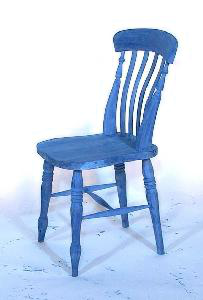

In [160]:
import cv2
import src as ya
import matplotlib.pyplot as plt
from keras.preprocessing.image import array_to_img

imgs = ya.data.getCaltech_images(random_state=1)
array_to_img(imgs['train'][120])

In [162]:
import plotly
import plotly.graph_objs as go

plotly.offline.init_notebook_mode(connected=True)

import numpy as np

for n_features in [2, 64, 512]:
    data_train, data_test = ya.data.getCaltech_KMeans(num_descriptors=1e5, 
                                          pickle_dump=False,
                                          num_features=n_features,
                                          random_state=1)
    X_train, y_train = data_train[:, :-1], data_train[:, -1]
    features = data_train[120]
    
    x_axis = np.arange(n_features)
    
    trace = go.Bar(
        x = x_axis,
        y = features,
        marker=dict(
            color='rgb(255,165,0)'
        )
    )
    
    data=[trace]
    
    layout = go.Layout(
        title='Windsor Chair Test: K = %i'%n_features,
        showlegend=False,
        xaxis=dict(
            linecolor='black',
            linewidth=2,
            mirror=True
        ),
        yaxis=dict(
            linecolor='black',
            linewidth=2,
            mirror=True
        )
    )
    
    fig = go.Figure(data=data, layout=layout)
    
    plotly.offline.iplot(fig)
    plotly.io.write_image(fig, 'assets/3.1/examples/plotly/%i_kmeans_chair_test.png'%n_features)
    
    
    
    


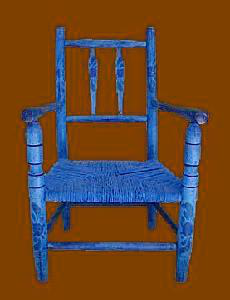

In [81]:
import cv2
import src as ya
import matplotlib.pyplot as plt
from keras.preprocessing.image import array_to_img

imgs = ya.data.getCaltech_images(random_state=1)
array_to_img(imgs['test'][130])

In [82]:
import plotly
import plotly.graph_objs as go

plotly.offline.init_notebook_mode(connected=True)

import numpy as np

for n_features in [2, 64, 512]:
    data_train, data_test = ya.data.getCaltech_KMeans(num_descriptors=1e5, 
                                          pickle_dump=False,
                                          num_features=n_features,
                                          random_state=1)
    X_test, y_test = data_query[:, :-1], data_query[:, -1]
    features = data_query[130]
    
    x_axis = np.arange(n_features)
    
    trace = go.Bar(
        x = x_axis,
        y = features,
        marker=dict(
            color='rgb(0,176,246)'
        )
    )
    
    data=[trace]
    
    layout = go.Layout(
        title='Windsor Chair Test: K = %i'%n_features,
        showlegend=False,
        xaxis=dict(
            linecolor='black',
            linewidth=2,
            mirror=True
        ),
        yaxis=dict(
            linecolor='black',
            linewidth=2,
            mirror=True
        )
    )
    
    fig = go.Figure(data=data, layout=layout)
    
    plotly.offline.iplot(fig)
    plotly.io.write_image(fig, 'assets/3.1/examples/plotly/%i_kmeans_chair_test.png'%n_features)
    
    
    
    


In [138]:
data_train, data_test = ya.data.getCaltech_KMeans(num_descriptors=1e5, 
                                      pickle_dump=False,
                                      num_features=16,
                                      random_state=1)
    
X_test, y_test = data_query[:, :-1], data_query[:, -1]
features = data_query[130]

x_axis = np.arange(16)

trace = go.Bar(
    x = x_axis,
    y = features,
    marker=dict(
        color='rgb(0,176,246)'
    )
)
    
data=[trace]

layout = go.Layout(
    title='Windsor Chair Test: K = %i'%n_features,
    showlegend=False,
    xaxis=dict(
        linecolor='black',
        linewidth=2,
        mirror=True
    ),
    yaxis=dict(
        linecolor='black',
        linewidth=2,
        mirror=True
    )
)

fig = go.Figure(data=data, layout=layout)

plotly.offline.iplot(fig)
plotly.io.write_image(fig, 'assets/3.1/examples/plotly/%i_kmeans_chair_test.png'%n_features)






In [128]:
all_data = ya.data.getCaltech_pre(num_features=2, random_state=0)

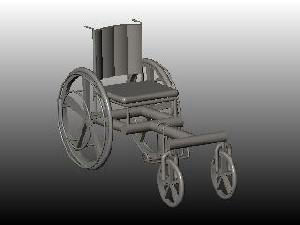

In [132]:
array_to_img(all_data.images_train[4][0])

In [134]:
all_data.images_test[]

NameError: name 'kp' is not defined